## Stocks Evaluation & Predictions

---

In [1]:
# Variable assigments

x = input("Enter the price of the stock you want to buy: ")
x = int(x)
y = input("Enter the number of stocks that you want to buy: ")
y = int(y)
z = input("Enter the name of the stock that you want to buy: ")
print('The total funds required to buy {} number of {} stocks at {} is {}'.format(y,z,x, x*y)) 

Enter the price of the stock you want to buy: 20
Enter the number of stocks that you want to buy: 100
Enter the name of the stock that you want to buy: AAPL
The total funds required to buy 100 number of AAPL stocks at 20 is 2000


---

### Stock Evaluation

In [2]:
# Import libraries

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [3]:
# Import data 

print(os.getcwd())
os.chdir('//Users/mareksturek/Documents/GitHub/real-application/data')
stocks_df = pd.read_csv('stocks.csv')
stocks_df.head(2)

/Users/mareksturek/Documents/GitHub/real-application/notebooks


,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966


In [4]:
# Describe data

print('Total Number of stocks : {}'.format(len(stocks_df.columns[1:])))

stocks_df.describe()

Total Number of stocks : 9


,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


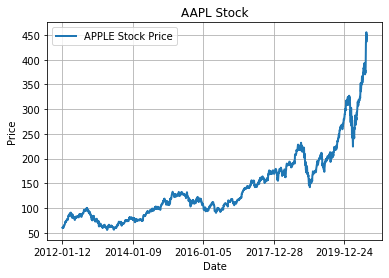

In [5]:
# AAPL Stock plot

stocks_df.plot(x = 'Date', y = 'AAPL', label = 'APPLE Stock Price', linewidth = 2);
plt.ylabel('Price')
plt.title('AAPL Stock')
plt.legend(loc="upper left")
plt.grid()

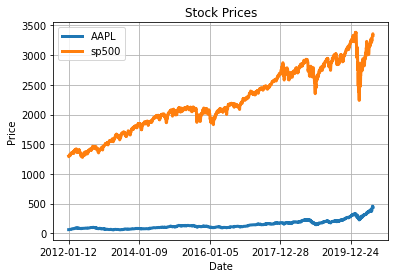

In [6]:
# Two stocks plot

stocks_df.plot(x = 'Date', y = ['AAPL', 'sp500'], linewidth = 3)
plt.ylabel('Price')
plt.title('Stock Prices')
plt.grid()

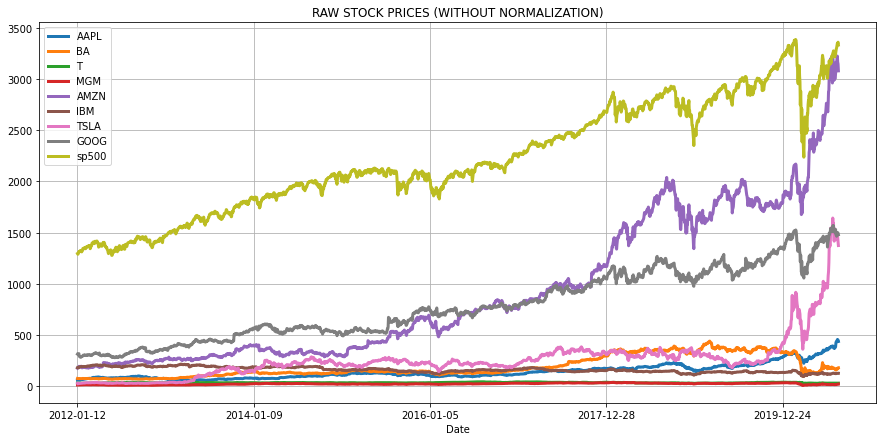

In [7]:
# All stocks plot

def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

show_plot(stocks_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

In [8]:
# Interactive plot, Plotly previously imported

"""
def interactive_plot(df, title):
  fig = px.line(title = title)
  
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i) 

  fig.show()
  
interactive_plot(stocks_df, 'Prices')
""" 

"\ndef interactive_plot(df, title):\n  fig = px.line(title = title)\n  \n  for i in df.columns[1:]:\n    fig.add_scatter(x = df['Date'], y = df[i], name = i) \n\n  fig.show()\n  \ninteractive_plot(stocks_df, 'Prices')\n"

In [9]:
# All stocks with normalizaton

def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i] / x[i][0]
    return x

normalize(stocks_df)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956


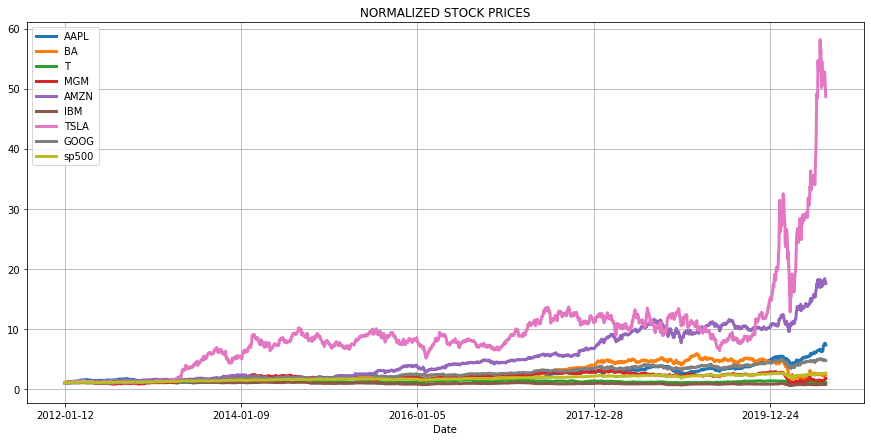

In [10]:
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

In [11]:
# Calculate individual stocks daily return

def daily_return(df):
  df_daily_return = df.copy()

  for i in df.columns[1:]:
    for j in range(1, len(df)):
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    df_daily_return[i][0] = 0
  return df_daily_return

stocks_daily_return = daily_return(stocks_df)
stocks_daily_return.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866


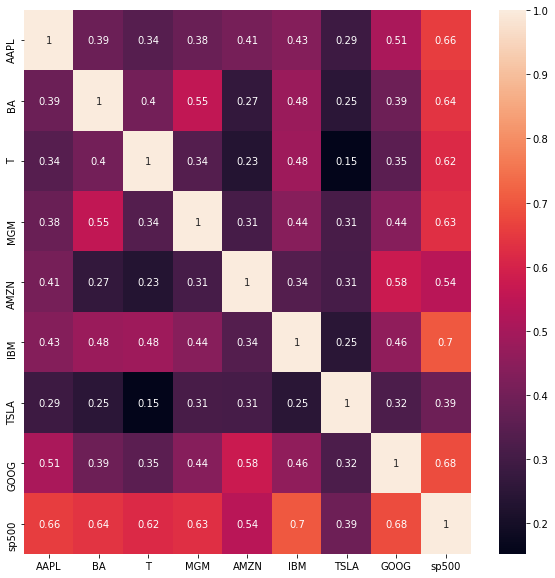

In [12]:
# Correlation plot 

cr = stocks_daily_return.drop(columns = ['Date']).corr()
plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(cr, annot = True, ax = ax);

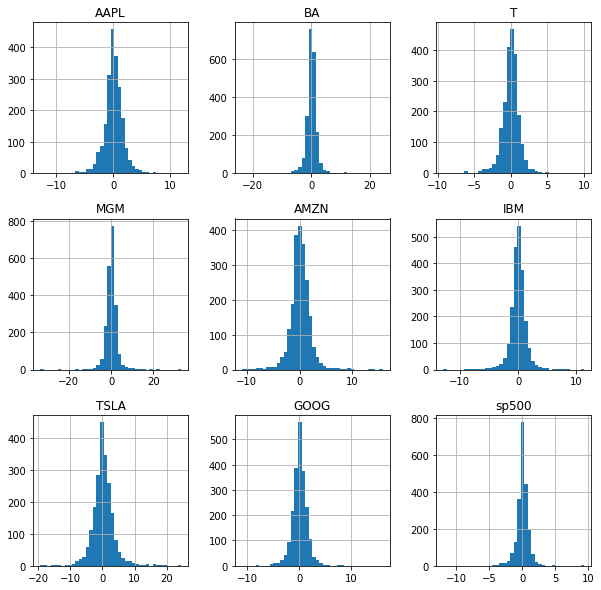

In [13]:
# Histogram of daily return

stocks_daily_return.hist(figsize=(10, 10), bins = 40);

In [14]:
# Interactive histogram, Plotly previously imported
"""
df_hist = stocks_daily_return.copy()
df_hist = df_hist.drop(columns = ['Date'])

data = []
for i in df_hist.columns:
  data.append(stocks_daily_return[i].values)
data

fig = ff.create_distplot(data, df_hist.columns)
fig.show()
"""

"\ndf_hist = stocks_daily_return.copy()\ndf_hist = df_hist.drop(columns = ['Date'])\n\ndata = []\nfor i in df_hist.columns:\n  data.append(stocks_daily_return[i].values)\ndata\n\nfig = ff.create_distplot(data, df_hist.columns)\nfig.show()\n"

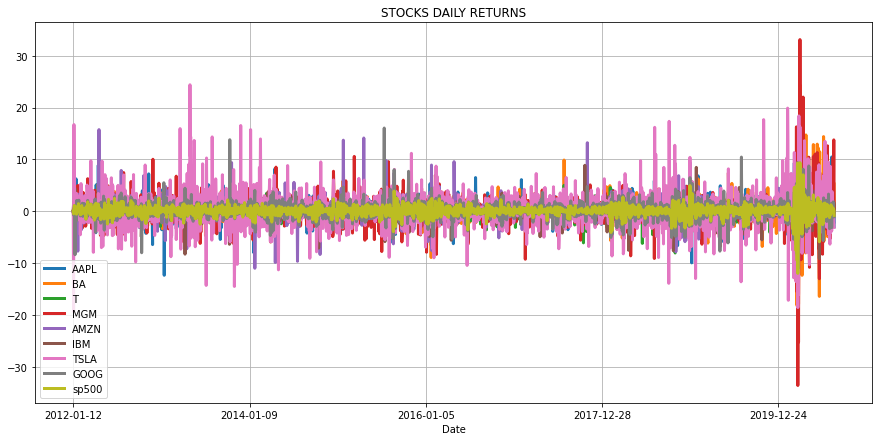

In [15]:
# Daily return plot

show_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

### Stocks Predicion

In [19]:
# Import libraries

import os
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [20]:
# Import data

print(os.getcwd())
os.chdir('//Users/mareksturek/Documents/GitHub/real-application/data')
stocks_price_df = pd.read_csv('stocks.csv')
stocks_vol_df = pd.read_csv('stocks_volume.csv')
stocks_price_df.head(2)

/Users/mareksturek/Documents/GitHub/real-application/data


,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966


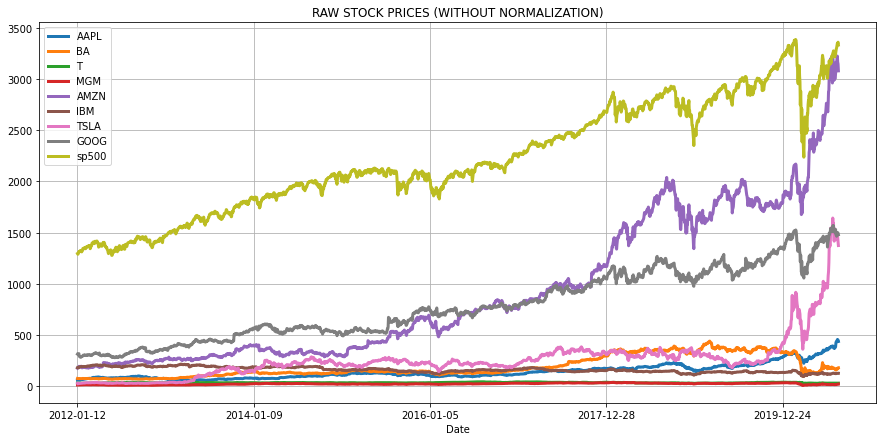

In [21]:
# All stocks price visualization

def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

show_plot(stocks_price_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

In [22]:
# Function to concatenate the date, stock price, and volume in one dataframe

def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

price_volume_df = individual_stock(stocks_price_df, stocks_vol_df, 'AAPL')
price_volume_df.head(2)

,Date,Close,Volume
0,2012-01-12,60.198570,53146800
1,2012-01-13,59.972858,56505400


In [23]:
# Function to return the input/output (target) data for AI/ML Model

def trading_window(data):
  n = 1
  data['Target'] = data[['Close']].shift(-n)
  return data

price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df.tail(2)

,Date,Close,Volume,Target
2156,2020-08-07,444.450012,49453300,450.910004
2157,2020-08-10,450.910004,53100900,437.500000


In [24]:
# Scale data

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))
price_volume_target_scaled_df

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [25]:
# Creating Feature and Target

X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [26]:
# Spliting the data this way, since order is important in time-series

split = int(0.75 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

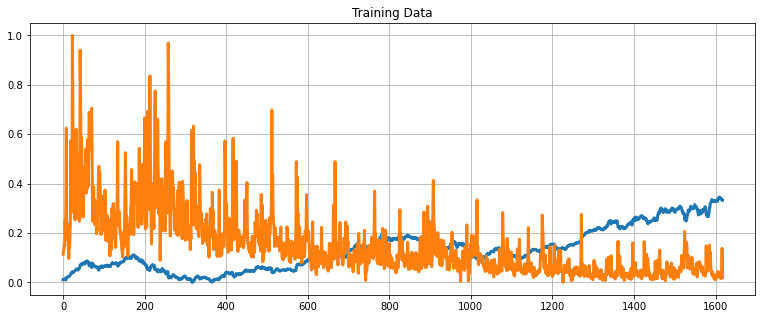

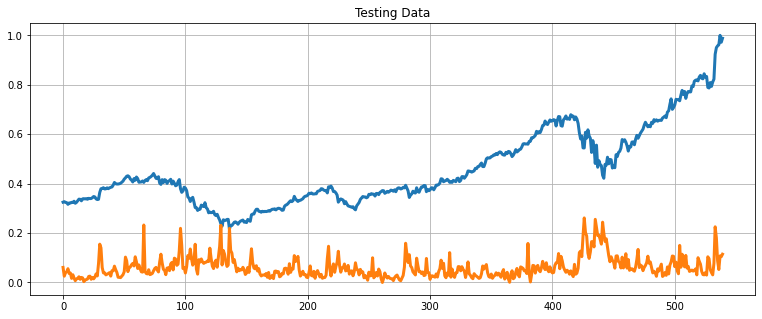

In [27]:
# Define a data plotting function

def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  # plt.legend(loc="upper left")
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [28]:
# Build and train a ridge linear regression mode

from sklearn.linear_model import Ridge
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge()

In [29]:
# Test the model and calculate its accuracy 

lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9311227075637692


In [30]:
# Make prediction

predicted_prices = regression_model.predict(X)
predicted_prices

Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [31]:
# Create a dataframe based on the dates in the individual stock data

df_predicted = price_volume_target_df[['Date']]
df_predicted['Close'] = close
df_predicted['Prediction'] = Predicted
df_predicted.head(2)

,Date,Close,Prediction
0,2012-01-12,0.011026,0.026286
1,2012-01-13,0.010462,0.025428


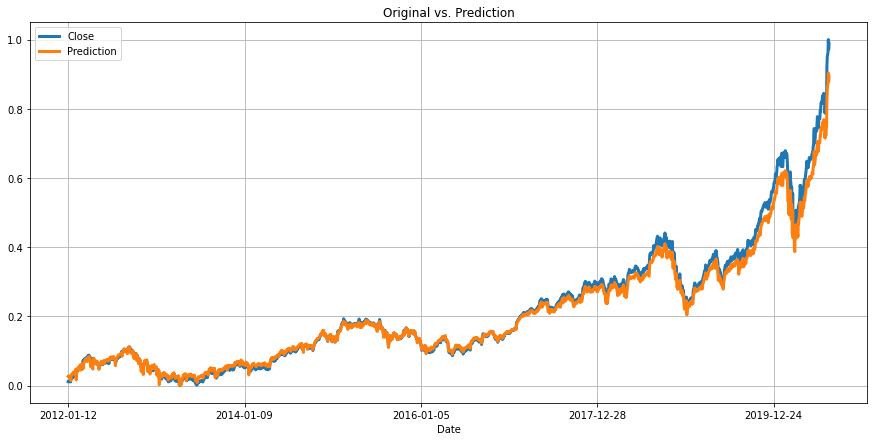

In [32]:
# Show plot

df_predicted.plot(x = 'Date', y = ['Close', 'Prediction'], figsize = (15,7), linewidth = 3)
plt.title('Original vs. Prediction')
plt.grid()